# CASE STUDY 10 - Probability

> Done by Jose Johnylal

----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the dataset 

In [2]:
mush = pd.read_csv('mushrooms.csv') 

In [3]:
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
mush.shape

(8124, 23)

In [5]:
mush.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

##  Pre-processing the dataset

### 1. Handling missing values if any

In [6]:
mush.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

**It is observed that there are no missing values.**

### 2. Separating the feature and target sets and encoding the feature set

In [7]:
X = mush.drop('class', axis=1)
y = mush['class']

Since the feature set (X) contains categorical data, one hot encoding needs to be performed.

In [8]:
X = pd.get_dummies(X)

### 3. Creating Train-Test split (70/30)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

##  Determining the suitable ML algorithm

In [10]:
mush['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

**Since the dataset contains labeled data, we use supervised learning techniques.**

**Since the target variable has binary classification, the following supervised classification techniques are used:**

* Logistic regression
* k-Nearest Neighbors
* Support Vector Machines (Linear, Polynomial, Radial)
* Decision Tree
* Random Forest
* Naive-Bayes Classifier (Bernoulli)

### 1. Logistic regression

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)
y_pred_lr = logit_model.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred_lr))

Accuracy score:  1.0


### 2. k-Nearest Neighbors

In [12]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

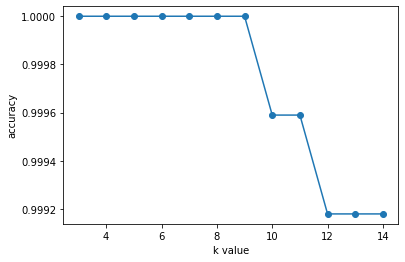

In [13]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

**It is observed that k=3,4,5,6,7,8,9 have the highest accuracy of 1.0**

**Final k-NN model with k=8**

In [14]:
classifier = KNeighborsClassifier(n_neighbors=8, metric='minkowski')
classifier.fit(X_train, y_train)
y_pred_knn = classifier.predict(X_test)

In [15]:
print('Accuracy score: ', accuracy_score(y_test, y_pred_knn))

Accuracy score:  1.0


### 2. Support Vector Machines

#### 2.1 Linear SVM

In [16]:
from sklearn.svm import SVC 
svm_linear = SVC(kernel = 'linear')
svm_linear.fit(X_train, y_train)
y_pred_slinear = svm_linear.predict(X_test)

In [17]:
print('Accuracy score: ', accuracy_score(y_test, y_pred_slinear))

Accuracy score:  1.0


#### 2.2 Polynomial SVM

In [18]:
acc_values = []
deg = np.arange(2,15)
for k in deg:
    svm_poly = SVC(kernel = 'poly', degree=k)
    svm_poly.fit(X_train, y_train)
    y_pred_poly = svm_poly.predict(X_test)
    acc = accuracy_score(y_test, y_pred_poly)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

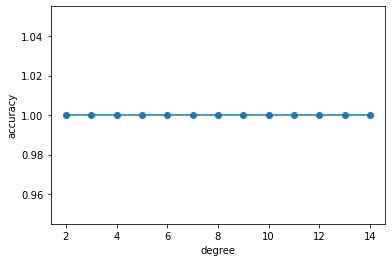

In [19]:
plt.plot(deg, acc_values, 'o-')
plt.xlabel('degree')
plt.ylabel('accuracy')

It is observed that all degrees produce the highest accuracy of 1.0

**Final Polynomial SVM model with degree=3**

In [20]:
svm_poly = SVC(kernel = 'poly', degree=3)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred_poly))

Accuracy score:  1.0


#### 2.3 Radial SVM

In [21]:
svm_radial = SVC(kernel = 'rbf')
svm_radial.fit(X_train, y_train)
y_pred_radial = svm_radial.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred_radial))

Accuracy score:  1.0


### 3. Decision tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred_dt))

Accuracy score:  1.0


### 4. Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred_rf))

Accuracy score:  1.0


### 5. Naive-Bayes Classifier (Bernoulli)

Since the target variable has binary classification, Bernoulli Naive Bayes Classifier is used.

In [24]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)
y_pred_nb = classifier.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred_nb))

Accuracy score:  0.9343724364232978


### FINAL OBSERVATIONS:

In [25]:
print('Accuracy score of logistic regression:               ', accuracy_score(y_test, y_pred_lr))
print('Accuracy score of k-NN classifier with k=8 :         ', accuracy_score(y_test, y_pred_knn))
print('Accuracy score of linear SVM:                        ', accuracy_score(y_test, y_pred_slinear))
print('Accuracy score of polynomial SVM with degree=3 :     ', accuracy_score(y_test, y_pred_poly))
print('Accuracy score of radial SVM:                        ', accuracy_score(y_test, y_pred_radial))
print('Accuracy score of Decision tree:                     ', accuracy_score(y_test, y_pred_dt))
print('Accuracy score of Random Forest Algorithm:           ', accuracy_score(y_test, y_pred_rf))
print('Accuracy score of Naive Bayes Classifier(Bernoulli): ', accuracy_score(y_test, y_pred_nb))

Accuracy score of logistic regression:                1.0
Accuracy score of k-NN classifier with k=8 :          1.0
Accuracy score of linear SVM:                         1.0
Accuracy score of polynomial SVM with degree=3 :      1.0
Accuracy score of radial SVM:                         1.0
Accuracy score of Decision tree:                      1.0
Accuracy score of Random Forest Algorithm:            1.0
Accuracy score of Naive Bayes Classifier(Bernoulli):  0.9343724364232978


## Conclusions:

> * All ML algorithms mentioned above **except Naive Bayes(Bernoulli)** provide the best result to predict whether the mushroom is edible or poisonous. 